Kametay Turar - 2381203 - April 26, 2024 - Lab 4 - SVM, NN, CNN

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

**Task 4.1: Multiclass SVM for Wine Data**




In [ ]:
#load data
wineData = np.load("/content/drive/MyDrive/Colab Notebooks/wineData-1.npy")
wineLabels = np.load("/content/drive/MyDrive/Colab Notebooks/wineLabels-1.npy")

In [ ]:
#split data
(train_data, test_data, train_labels, test_labels) = train_test_split(wineData, wineLabels, test_size=0.2, random_state=42)

In [ ]:
#check data
print(wineData.shape)
print(wineLabels.shape)
print(train_data.shape)
print(test_data.shape)
print(train_labels.shape)
print(test_labels.shape)

# Print dataset details
print(f'Number of features: {train_data.shape[1]}')
print(f'Number of training samples: {train_data.shape[0]}')
print(f'Number of testing samples: {test_data.shape[0]}')
print(f'Number of classes: {len(np.unique(train_labels))}')

(178, 13)
(178,)
(142, 13)
(36, 13)
(142,)
(36,)
Number of features: 13
Number of training samples: 142
Number of testing samples: 36
Number of classes: 3


In [ ]:
#standartise data
scaler = StandardScaler()
train_data=scaler.fit_transform(train_data)
test_data=scaler.transform(test_data)

In [ ]:
#creating and training multiclass SVM
clf = SVC(kernel='linear')
clf.fit(train_data, train_labels)

SVC(kernel='linear')

In [ ]:
#predicting labels
predicted_labels = clf.predict(test_data)
accuracy = clf.score(test_data, test_labels)
print("Model accuracy:", accuracy)

Model accuracy: 0.9444444444444444


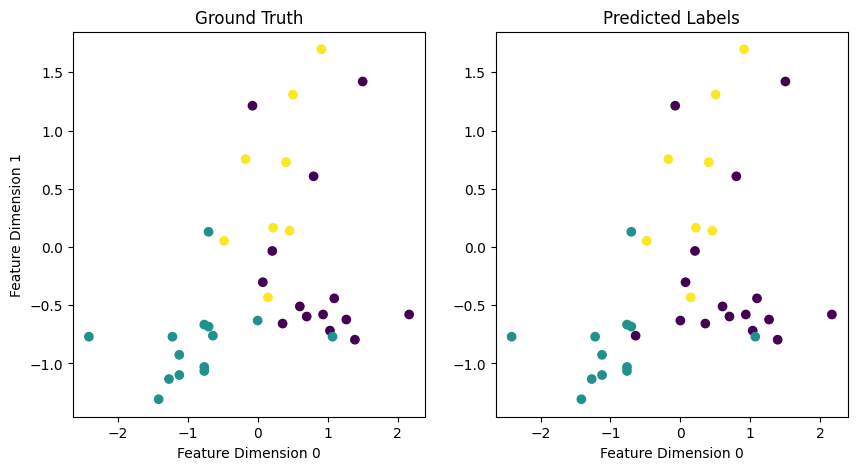

In [ ]:
plt.figure(figsize=(10, 5))

#Ground truth
plt.subplot(1, 2, 1)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

#Predicted Labels
plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_labels)
plt.title('Predicted Labels')
plt.xlabel('Feature Dimension 0')

plt.show()

**Task 4.2: Neural Network for Wine Data**

In [ ]:
# Create a Sequential neural network model
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Dense(4, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(train_labels)), activation=tf.nn.softmax)])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(train_data, train_labels, validation_split=0.2, epochs=100, verbose=0)

In [ ]:
# Predict labels for the testing set
predicted_labels_nn = np.argmax(model.predict(test_data), axis=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(train_data, train_labels, verbose=0)
print(f'Test accuracy: {test_accuracy:.4f}')

2/2 [==============================] - 0s 6ms/step
Test accuracy: 0.9789


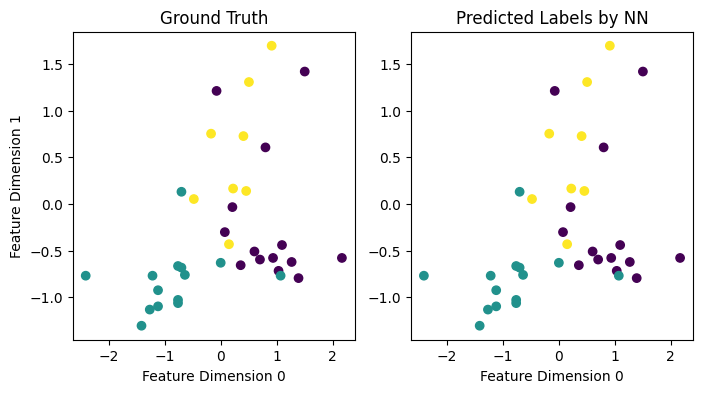

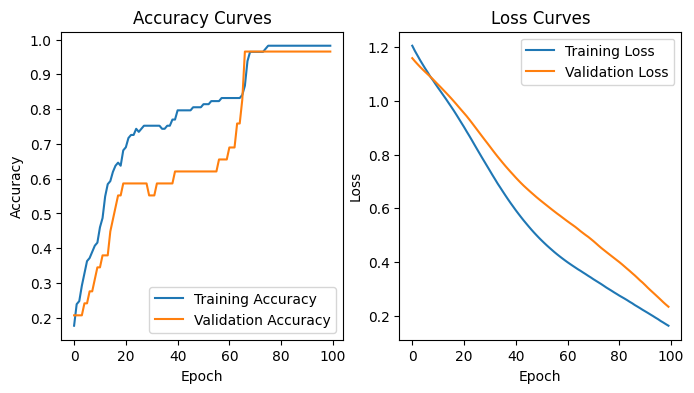

In [ ]:
# Visualization
plt.figure(figsize=(8, 4))

# Ground truth
plt.subplot(1, 2, 1)
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels)
plt.title('Ground Truth')
plt.xlabel('Feature Dimension 0')
plt.ylabel('Feature Dimension 1')

# Predicted Labels by Neural Network
plt.subplot(1, 2, 2)
plt.scatter(test_data[:, 0], test_data[:, 1], c=predicted_labels_nn)
plt.title('Predicted Labels by NN')
plt.xlabel('Feature Dimension 0')

# Training curves
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss curves
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 56        
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
 dense_22 (Dense)            (None, 3)                 33        
                                                                 
Total params: 139 (556.00 Byte)
Trainable params: 139 (556.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


**Task 4.3: Neural Network for Digit Recognition**

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f'MNIST sample shape: {x_train.shape[1:]}')
print(f'Number of training samples: {x_train.shape[0]}')
print(f'Number of testing samples: {x_test.shape[0]}')
print(f'Number of classes: {len(np.unique(y_train))}')

11490434/11490434 [==============================] - 0s 0us/step
MNIST sample shape: (28, 28)
Number of training samples: 60000
Number of testing samples: 10000
Number of classes: 10


In [ ]:
# Flattening the images
x_train = x_train.reshape((60000, 784))
x_test = x_test.reshape((10000, 784))

# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Create a Sequential neural network model
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(32, activation=tf.nn.relu),
    tf.keras.layers.Dense(len(np.unique(y_train)), activation=tf.nn.softmax)])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 6s 3ms/step - loss: 0.3167 - accuracy: 0.9079 - val_loss: 0.1635 - val_accuracy: 0.9523
Epoch 2/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.1408 - accuracy: 0.9575 - val_loss: 0.1353 - val_accuracy: 0.9590
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1045 - accuracy: 0.9680 - val_loss: 0.1273 - val_accuracy: 0.9619
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0798 - accuracy: 0.9749 - val_loss: 0.1046 - val_accuracy: 0.9682
Epoch 5/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0682 - accuracy: 0.9791 - val_loss: 0.1094 - val_accuracy: 0.9682
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0563 - accuracy: 0.9827 - val_loss: 0.1050 - val_accuracy: 0.9708
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0486 - accuracy: 0.9844 - val_loss: 0.0995 - val_accuracy:

313/313 [==============================] - 1s 2ms/step - loss: 0.0998 - accuracy: 0.9723
Test accuracy: 0.9723


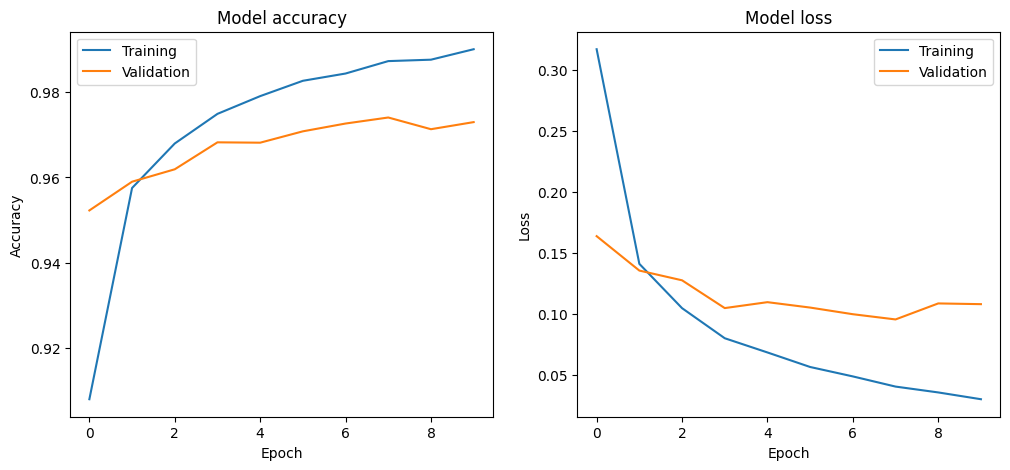

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

# Plot the training and validation accuracy and loss
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

**Task 4.4: Convolutional Neural Network for Digit Recognition**

In [ ]:
#Load the dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()


In [ ]:
#Expanding the data to add a channel dimension
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

In [ ]:
np.shape(x_train)

(60000, 28, 28, 1)

In [ ]:
# Normalize the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Create a Convolutional neural network model
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D((2, 2)),
  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 51s 33ms/step - loss: 0.1647 - accuracy: 0.9492 - val_loss: 0.0562 - val_accuracy: 0.9837
Epoch 2/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0427 - val_accuracy: 0.9887
Epoch 3/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0362 - accuracy: 0.9882 - val_loss: 0.0458 - val_accuracy: 0.9858
Epoch 4/10
1500/1500 [==============================] - 48s 32ms/step - loss: 0.0266 - accuracy: 0.9915 - val_loss: 0.0433 - val_accuracy: 0.9879
Epoch 5/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0215 - accuracy: 0.9930 - val_loss: 0.0515 - val_accuracy: 0.9858
Epoch 6/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0173 - accuracy: 0.9945 - val_loss: 0.0464 - val_accuracy: 0.9877
Epoch 7/10
1500/1500 [==============================] - 50s 33ms/step - loss: 0.0147 - accuracy: 0.9949 - val_loss: 0.0485 -

313/313 [==============================] - 3s 9ms/step - loss: 2.6121 - accuracy: 0.1135

Accuracy: 0.1135


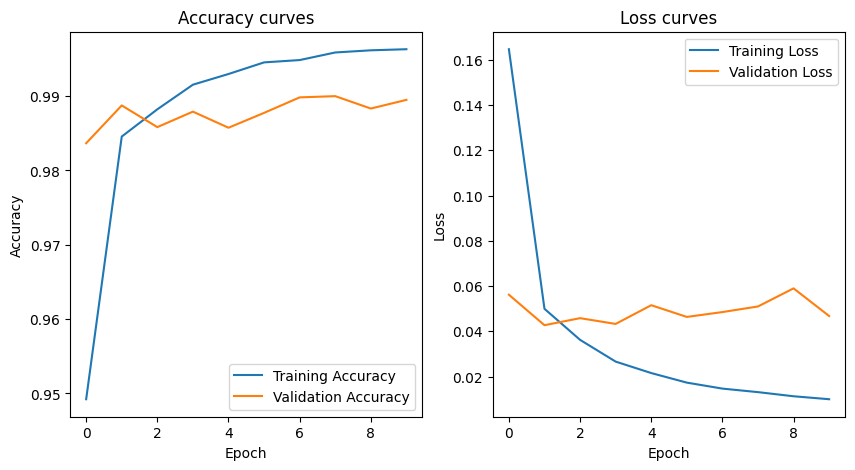

In [ ]:
# Predict labels for the testing set
predictions = model.predict(x_test)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f'\nAccuracy: {accuracy:.4f}')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy curves')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()